## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Disable warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Importing Data

In [3]:
data = pd.read_csv("marks.csv")

In [4]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      school    sex    age  address  famsize  Pstatus   Medu   Fedu   Mjob  \
0     False  False  False    False    False    False  False  False  False   
1     False  False  False    False    False    False  False  False  False   
2     False  False  False    False    False    False  False  False  False   
3     False  False  False    False    False    False  False  False  False   
4     False  False  False    False    False    False  False  False  False   
..      ...    ...    ...      ...      ...      ...    ...    ...    ...   
390   False  False  False    False    False    False  False  False  False   
391   False  False  False    False    False    False  False  False  False   
392   False  False  False    False    False    False  False  False  False   
393   False  False  False    False    False    False  False  False  False   
394   False  False  False    False    False    False  False  False  False   

      Fjob  .

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## EDA

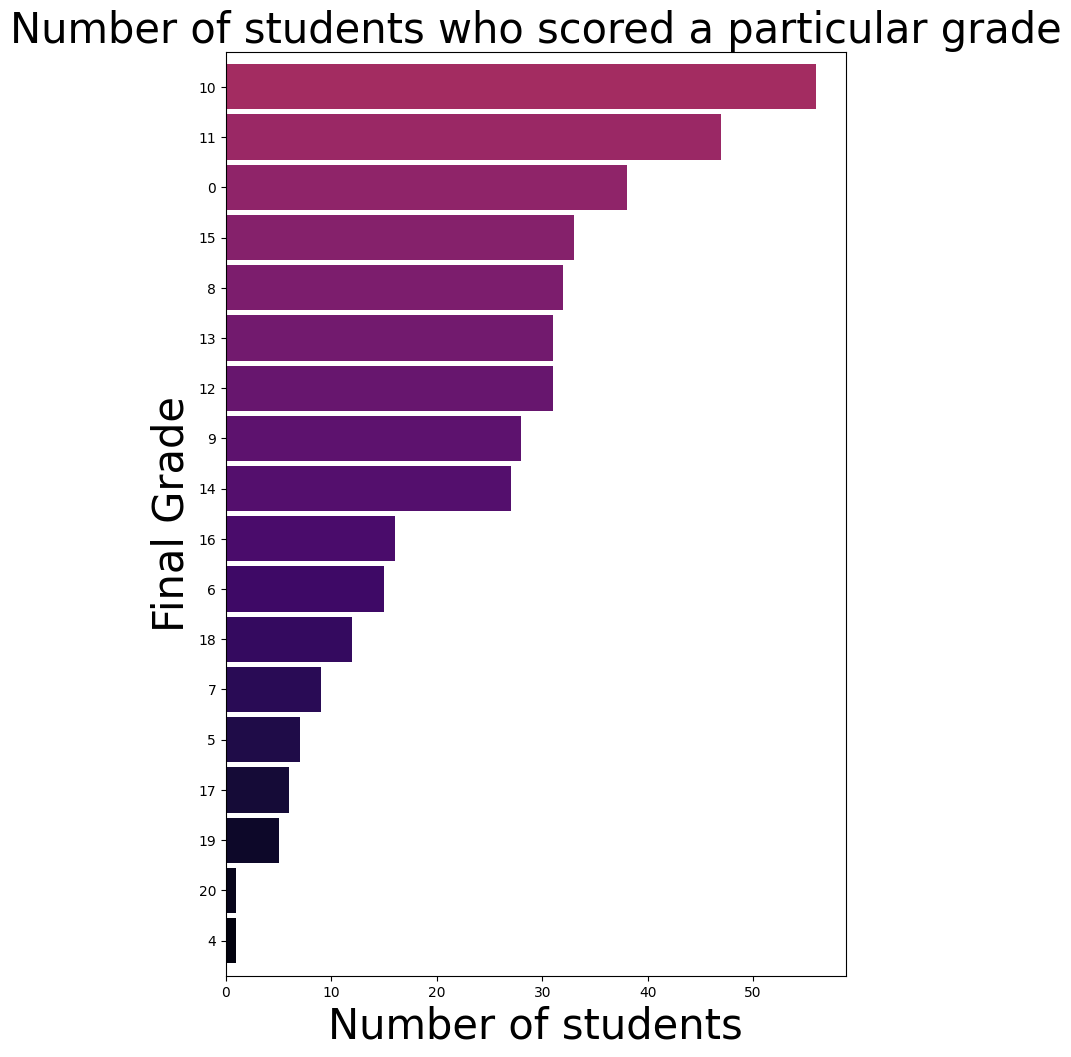

In [9]:
plt.subplots(figsize=(8,12))
grade_counts = data['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

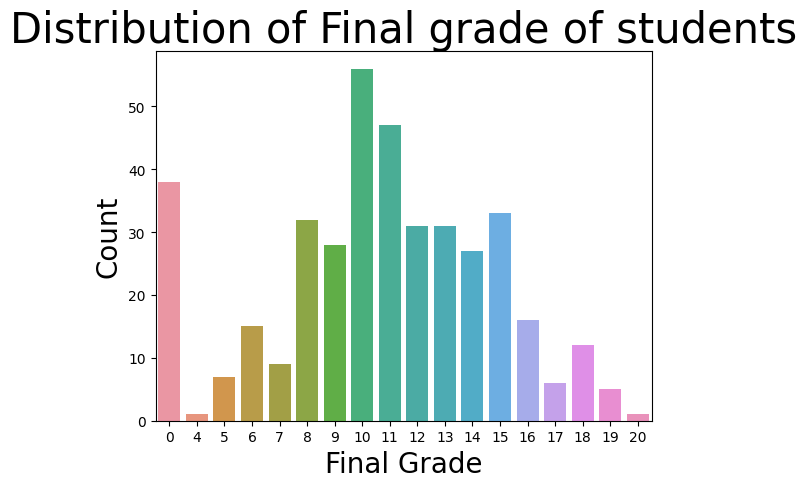

In [10]:
b = sns.countplot(x = data['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

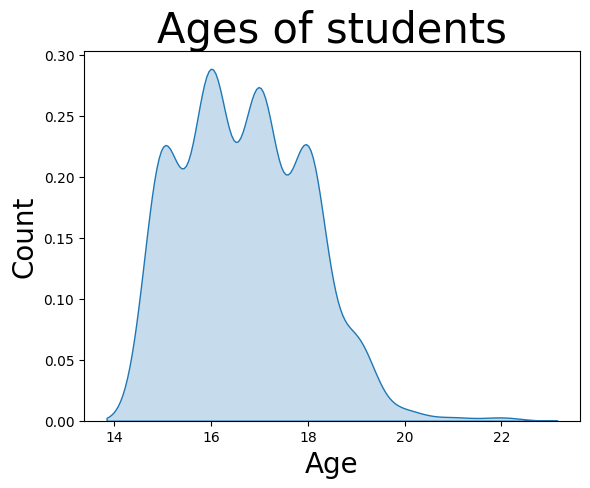

In [11]:
sns.kdeplot(data['age'], shade=True)
plt.title('Ages of students', fontsize = 30)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

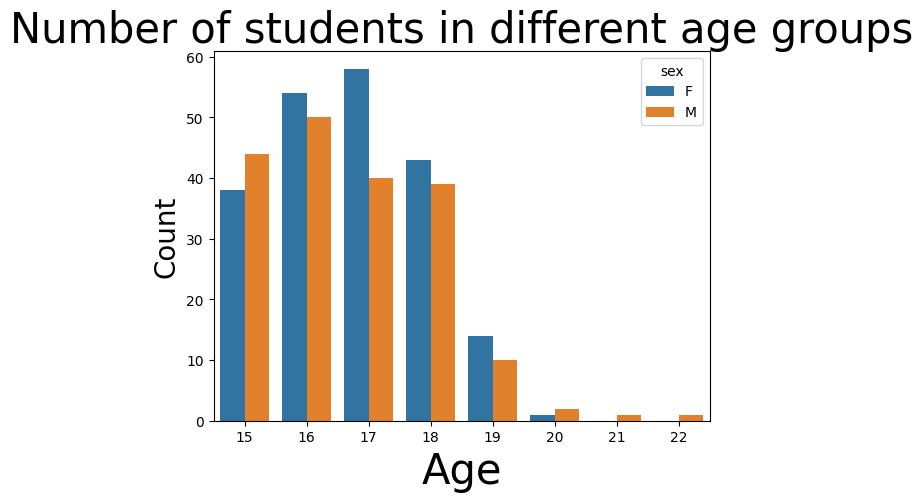

In [12]:
sns.countplot(x="age", hue="sex", data=data)
plt.title("Number of students in different age groups", fontsize=30)
plt.xlabel("Age", fontsize=30)
plt.ylabel("Count", fontsize=20)
plt.show()

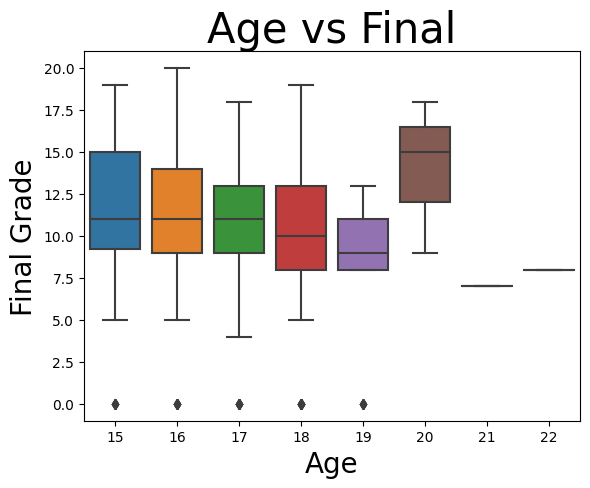

In [13]:
sns.boxplot(x="age", y = "G3", data = data)
plt.title("Age vs Final", fontsize = 30)
plt.xlabel("Age", fontsize = 20)
plt.ylabel("Final Grade", fontsize = 20)
plt.show()

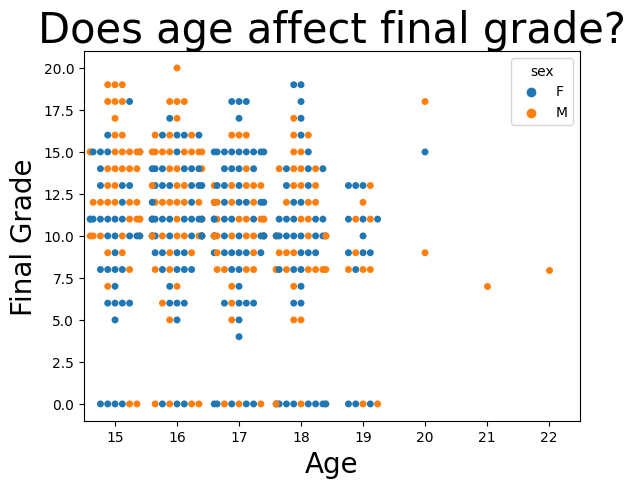

In [14]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=data)
b.axes.set_title('Does age affect final grade?', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

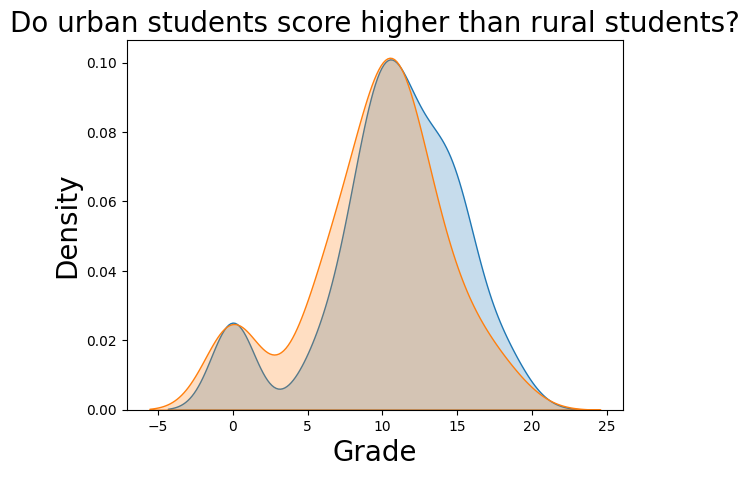

In [15]:
sns.kdeplot(data.loc[data['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(data.loc[data['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

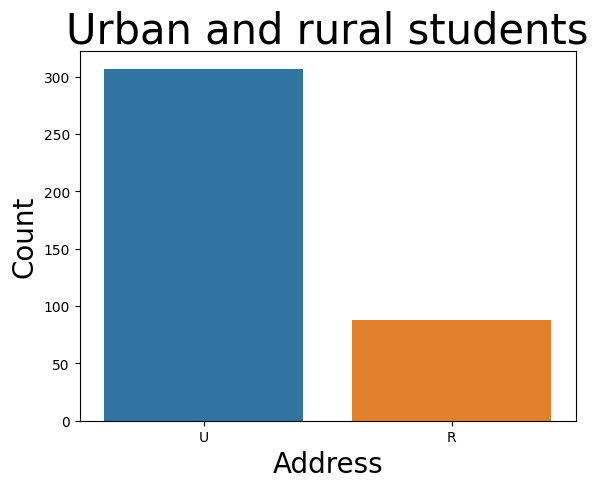

In [16]:
b = sns.countplot(x = data['address'])
b.axes.set_title('Urban and rural students', fontsize = 30)
b.set_xlabel('Address', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

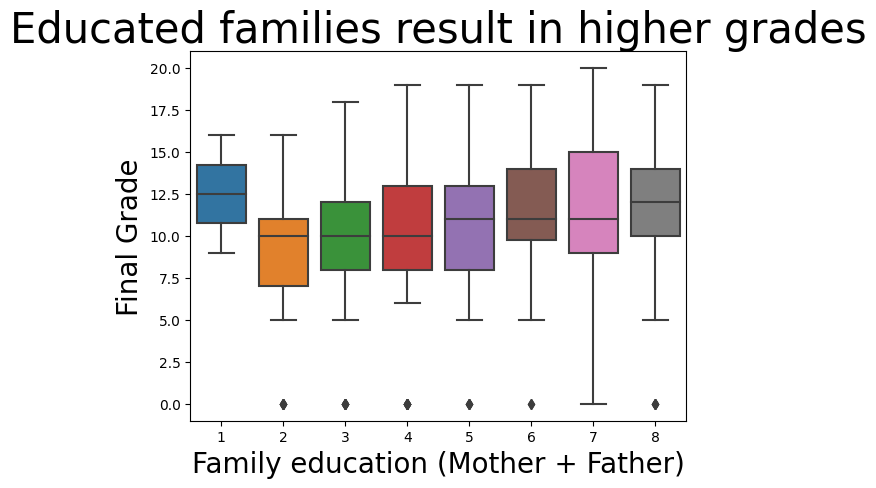

In [17]:
family_ed = data['Fedu'] + data['Medu'] 
b = sns.boxplot(x=family_ed,y=data['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

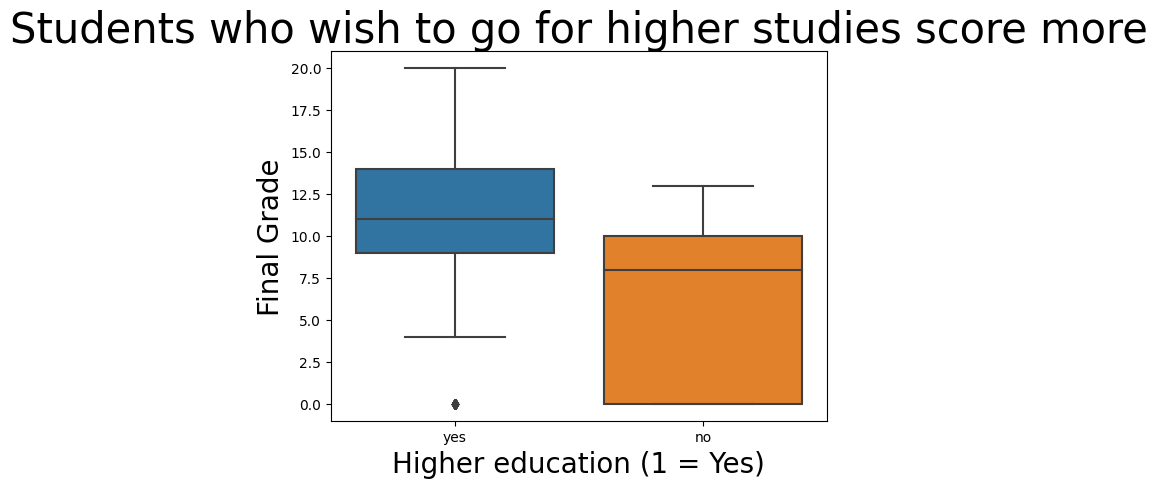

In [18]:
b = sns.boxplot(x = data['higher'], y=data['G3'])
b.axes.set_title('Students who wish to go for higher studies score more', fontsize = 30)
b.set_xlabel('Higher education (1 = Yes)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

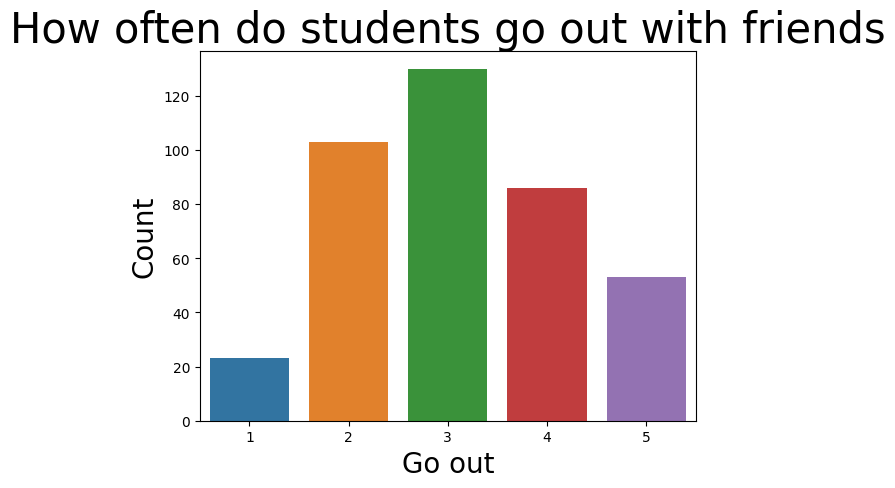

In [19]:
b = sns.countplot(x = data['goout'])
b.axes.set_title('How often do students go out with friends', fontsize = 30)
b.set_xlabel('Go out', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

## Splitting the dataset

In [20]:
x = np.array(data[["G1", "G2", "failures", "studytime", "absences"]])
y = np.array(data["G3"])

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)

## Training the Model for Student Grades Prediction

In [22]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
lr.score(xtrain,